In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from models.regression.MLPRegressionCustom import MLP
from models.metrics.regression import RMSE, MSE, MAE
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = np.genfromtxt('./concrete.csv', delimiter=',')
X = df[:, :-1]
y = df[:, -1].reshape(-1, 1)

X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

### Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
_X_train, X_val, _y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
neuronios = [3, 5, 10, 15]
learning_rate = [0.1, 0.15, 0.25, 0.4]
momentum = [0.3, 0.4, 0.9]

result = []

elected = None

for n in neuronios:
    for l in learning_rate:
        for m in momentum:
            net = MLP(_X_train, _y_train, n, eta=l, niterations=200, momentum=m, outtype="linear")
            net.fit(_X_train, _y_train, X_val, y_val)
            result.append([net, np.min(net.errors_valid)])
            print("Neuronios: {} Learning Rate: {}, Momentum: {}. Score: {}".format(n, l, m, np.min(net.errors_valid)))

elected = result[np.argmin(np.array(result)[:, 1])][0]

Iteration:  0  Error:  63.985685831598346
Iteration:  100  Error:  13.638887226252644
Neuronios: 3 Learning Rate: 0.1, Momentum: 0.3. Score: 4.454029353093462
Iteration:  0  Error:  341.8922996796566
Iteration:  100  Error:  13.319787736039213
Neuronios: 3 Learning Rate: 0.1, Momentum: 0.4. Score: 4.31935325061832
Iteration:  0  Error:  96.40427217475789
Iteration:  100  Error:  10.723656635662724
Neuronios: 3 Learning Rate: 0.1, Momentum: 0.9. Score: 2.5657826596881996
Iteration:  0  Error:  37.06514542672549
Iteration:  100  Error:  13.409520447001595
Neuronios: 3 Learning Rate: 0.15, Momentum: 0.3. Score: 4.351061187148573
Iteration:  0  Error:  197.90619766446923
Iteration:  100  Error:  12.144646835501513
Neuronios: 3 Learning Rate: 0.15, Momentum: 0.4. Score: 3.844342569189143
Iteration:  0  Error:  72.50362121963056
Iteration:  100  Error:  9.428535937489741
Neuronios: 3 Learning Rate: 0.15, Momentum: 0.9. Score: 2.1479522517683325
Iteration:  0  Error:  109.20926348033368
Itera

Iteration:  0  Error:  0.446294192115839
Iteration:  100  Error:  0.13007650852010758
Iteration:  200  Error:  0.12713332428491295


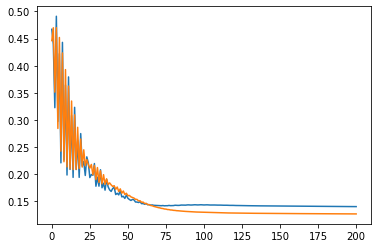

Iteration:  0  Error:  0.23518687586477385
Iteration:  100  Error:  0.017929764278381135
Iteration:  200  Error:  0.016270874711252374


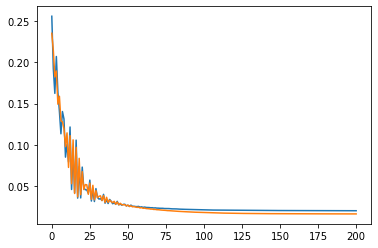

Iteration:  0  Error:  0.35528967462895006
Iteration:  100  Error:  0.10946198399394147
Iteration:  200  Error:  0.10349116890864413


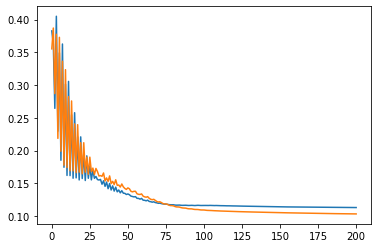

In [12]:
metrics = [
    ("RMSE", RMSE()),
    ("MSE", MSE()),
    ("MSE", MAE())
]

for name, metric in metrics:
    net = MLP(_X_train, _y_train, elected.nhidden, eta=elected.eta, niterations=201, momentum=elected.momentum,outtype="linear", metric=metric)
    net.fit(_X_train, _y_train, X_test, y_test)
    plt.plot(net.errors_valid)
    plt.plot(net.errors_train)
    plt.show()